#### Smart Lead Scoring Engine


#### Can you identify the potential leads for a D2C startup?




### Problem Statement


A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.



About Dataset


You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.

a).train.csv contains the leads information of last 1 year from Jan 2021 to Dec 2021. And also the target variable indicating if the user will buy the product in next 3 months or not 

b).test.csv contains the leads information of the current year from Jan 2022 to March 2022. You need to predict if the lead will buy the product in next 3 months or not.

c). sample_submission.csv contains 2 variables 

### Problem type :-

#### It's a Binary classification problem, Because target / Dependent feature only have 0's and 1's .

In [3]:
# Importing Basic Libraries.
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading Data file's.
Train = pd.read_csv("train_wn75k28.csv")
Test = pd.read_csv("test_Wf7sxXF.csv")
Submission = pd.read_csv("sample_submission_2zvVjBu.csv")

In [3]:
# Showing top 5 row's of Train Data.
Train.head(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [4]:
# Showing down 5 row's of Train Data.
Train.tail(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
39160,39161,2021-12-31,2,5,NaN,2019-08-11,1,0,0,0,0,0,1,0,0,0,0,0,0


## Above Signup_date is not important because there is no pattern between lead up and signup, many user created or Sign up on the website and kept long term no activity. So, we will drop signup_date column

In [5]:
# Showing count's of Train Data "buy" feature.
Train.buy.value_counts()

0    37163
1     1998
Name: buy, dtype: int64

<AxesSubplot:xlabel='buy', ylabel='count'>

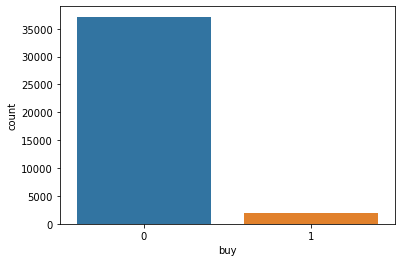

In [6]:
# Plotting above count's of "buy" column
sns.countplot(data=Train, x='buy', order=Train.buy.value_counts().index)

#### Dependent Features are imbalanced, but F1 Score will deal with this abnormality.

In [7]:
# Showing count's of "products_purchased" of Train Data.
Train.products_purchased.value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [8]:
# Showing null value's in "products_purchased" column.
Train.products_purchased.isna().sum()

20911

In [9]:
# Filling null value's with median(mean and mode will be same for this column).
Train['products_purchased'].fillna(Train['products_purchased'].median(), inplace=True)

In [10]:
Train['products_purchased'] = Train['products_purchased'].astype(int)

In [11]:
# Displaying null value which are 0 now , we filled with integer median value. 
Train.products_purchased.isna().sum()

0

#### Above filled nan values in products_purchase with median value of column

In [12]:
# Displaying null value's in complete Train dataset
# "signup_date" column having null value, even we dont require it because they dont have relation with lead creation date.
Train.isna().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased          0
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [13]:
Train["Week_of_Year"] = pd.DatetimeIndex(Train['created_at']).strftime('%U').astype(int)
Train["Day_Number"] = pd.DatetimeIndex(Train['created_at']).dayofweek
Train["Month_Number"] = pd.DatetimeIndex(Train['created_at']).month
Train["Day_Of_Year"] = pd.DatetimeIndex(Train['created_at']).dayofyear
Train["Days_In_Month"] = pd.DatetimeIndex(Train['created_at']).days_in_month

#### Created New column's based on created_at column date , which help us to find buy status because february has 28/29 days some months has 30/31 days. So, this is also a pattern which algorithms can learn.

In [14]:
Train.tail(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Week_of_Year,Day_Number,Month_Number,Day_Of_Year,Days_In_Month
39156,39157,2021-12-31,11,11,2,2017-10-19,1,0,0,0,...,0,0,0,0,0,52,4,12,365,31
39157,39158,2021-12-31,3,9,3,NaN,0,0,0,0,...,0,0,0,0,0,52,4,12,365,31
39158,39159,2021-12-31,8,7,2,NaN,1,0,0,0,...,0,0,0,0,0,52,4,12,365,31
39159,39160,2021-12-31,7,12,2,NaN,0,0,0,0,...,0,0,1,0,0,52,4,12,365,31
39160,39161,2021-12-31,2,5,2,2019-08-11,1,0,0,0,...,0,0,0,0,0,52,4,12,365,31


In [15]:
Train.drop(["id","created_at","signup_date"], axis=1, inplace=True)
Train  = Train[['Week_of_Year', 'Day_Number', 'Month_Number', 'Day_Of_Year', 'Days_In_Month', 'campaign_var_1',
                'campaign_var_2', 'products_purchased', 'user_activity_var_1', 'user_activity_var_2',
                'user_activity_var_3', 'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
                'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9', 
                'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12', 'buy']]
Train.head(2)

,Week_of_Year,Day_Number,Month_Number,Day_Of_Year,Days_In_Month,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,...,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,0,4,1,1,31,1,2,2,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,4,1,1,31,2,1,2,1,0,...,0,0,0,1,0,0,0,0,0,0


#### Dropped ID and Date columns as it is not requires further.

In [16]:
Train.shape

(39161, 21)

#### a). Above Day Number shows [ 0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday' ]. And if you check 2021 calendar , you will see 1-1-2021 was Friday i.e Day_Number 4 according above dataframe (it will help us to get some co-relation on unseen data , as algorithms work on pattern of data)

#### b). campaign_var_1 is offline and campaign_var_2 is digital marketing campaign organised by Company 

In [17]:
Train.isna().sum()

Week_of_Year            0
Day_Number              0
Month_Number            0
Day_Of_Year             0
Days_In_Month           0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

### Now , we will preprocess Test dataset.

In [5]:
Test['products_purchased'].fillna(Test['products_purchased'].median(), inplace=True)
Test['products_purchased'] = Test['products_purchased'].astype(int)
Test.products_purchased.isna().sum()

0

In [6]:
Test["Week_of_Year"] = pd.DatetimeIndex(Test['created_at']).strftime('%U').astype(int)
Test["Day_Number"] = pd.DatetimeIndex(Test['created_at']).dayofweek
Test["Month_Number"] = pd.DatetimeIndex(Test['created_at']).month
Test["Day_Of_Year"] = pd.DatetimeIndex(Test['created_at']).dayofyear
Test["Days_In_Month"] = pd.DatetimeIndex(Test['created_at']).days_in_month
Test.drop(["id","created_at","signup_date"], axis=1, inplace=True)
Test  = Test[['Week_of_Year', 'Day_Number', 'Month_Number', 'Day_Of_Year', 'Days_In_Month', 'campaign_var_1',
                'campaign_var_2', 'products_purchased', 'user_activity_var_1', 'user_activity_var_2',
                'user_activity_var_3', 'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
                'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9', 
                'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12']]
Test.head(2)

,Week_of_Year,Day_Number,Month_Number,Day_Of_Year,Days_In_Month,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,0,5,1,1,31,2,2,2,1,1,0,0,0,1,0,0,0,0,1,0
1,0,5,1,1,31,4,7,3,1,0,0,0,0,0,0,1,0,0,0,0


#### All the Steps in preprocessing Test data is same as Train data.

In [20]:
# Taking to Independent (X) and Dependent (y) feature's
X = Train.drop('buy', axis = 1)
y = Train.buy

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, train_size=0.8, random_state=42)

#### Splitting Train data into train and test as 80:20 resp.

### * Approach's

#### As our data is conditional , we will try with "Tree-based models" which use a series of if-then rules to generate predictions from one or more decision trees for classification (predicting categorical values)

# 1).

####  We will start with Catboost Classifier, because it is fast tree based algorithm which uses Decision Tree as base model.

In [22]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
CBC = CatBoostClassifier()

parameters = {'depth'         : [4,5,6,7,8,9, 10],
               'learning_rate' : [0.01,0.02,0.03,0.04],
               'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
              }

Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

0:	learn: 0.6239832	total: 144ms	remaining: 14.2s
1:	learn: 0.5704234	total: 154ms	remaining: 7.53s
2:	learn: 0.5197448	total: 163ms	remaining: 5.27s
3:	learn: 0.4731358	total: 172ms	remaining: 4.12s
4:	learn: 0.4322176	total: 180ms	remaining: 3.42s
5:	learn: 0.3996164	total: 190ms	remaining: 2.98s
6:	learn: 0.3708677	total: 199ms	remaining: 2.64s
7:	learn: 0.3419965	total: 206ms	remaining: 2.37s
8:	learn: 0.3176171	total: 215ms	remaining: 2.17s
9:	learn: 0.2951986	total: 223ms	remaining: 2s
10:	learn: 0.2767953	total: 231ms	remaining: 1.87s
11:	learn: 0.2591592	total: 240ms	remaining: 1.76s
12:	learn: 0.2447394	total: 249ms	remaining: 1.67s
13:	learn: 0.2289144	total: 258ms	remaining: 1.58s
14:	learn: 0.2163455	total: 268ms	remaining: 1.52s
15:	learn: 0.2039653	total: 276ms	remaining: 1.45s
16:	learn: 0.1938305	total: 286ms	remaining: 1.39s
17:	learn: 0.1860807	total: 295ms	remaining: 1.34s
18:	learn: 0.1786155	total: 304ms	remaining: 1.29s
19:	learn: 0.1723433	total: 312ms	remaining:

In [116]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier(depth= 5, iterations = 100, learning_rate =  0.04,custom_loss="F1")


cat_features = list(range(0, X_train.shape[1]))
CBC.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
)

scorex = CBC.score(X_train, y_train)
print("Training score: ", scorex)


0:	learn: 0.6299341	test: 0.6296515	best: 0.6296515 (0)	total: 89.6ms	remaining: 8.87s
1:	learn: 0.5642080	test: 0.5636512	best: 0.5636512 (1)	total: 168ms	remaining: 8.21s
2:	learn: 0.5154768	test: 0.5146750	best: 0.5146750 (2)	total: 237ms	remaining: 7.67s
3:	learn: 0.4646723	test: 0.4634062	best: 0.4634062 (3)	total: 311ms	remaining: 7.47s
4:	learn: 0.4228818	test: 0.4215124	best: 0.4215124 (4)	total: 386ms	remaining: 7.33s
5:	learn: 0.3896015	test: 0.3880199	best: 0.3880199 (5)	total: 457ms	remaining: 7.17s
6:	learn: 0.3602212	test: 0.3584592	best: 0.3584592 (6)	total: 527ms	remaining: 7s
7:	learn: 0.3321501	test: 0.3302498	best: 0.3302498 (7)	total: 596ms	remaining: 6.85s
8:	learn: 0.3079172	test: 0.3056601	best: 0.3056601 (8)	total: 666ms	remaining: 6.73s
9:	learn: 0.2865741	test: 0.2839832	best: 0.2839832 (9)	total: 737ms	remaining: 6.63s
10:	learn: 0.2678735	test: 0.2649460	best: 0.2649460 (10)	total: 806ms	remaining: 6.52s
11:	learn: 0.2523616	test: 0.2492387	best: 0.2492387 (

95:	learn: 0.0990386	test: 0.0924489	best: 0.0924489 (95)	total: 6.42s	remaining: 267ms
96:	learn: 0.0989907	test: 0.0924179	best: 0.0924179 (96)	total: 6.48s	remaining: 200ms
97:	learn: 0.0988664	test: 0.0923109	best: 0.0923109 (97)	total: 6.55s	remaining: 134ms
98:	learn: 0.0988381	test: 0.0922622	best: 0.0922622 (98)	total: 6.62s	remaining: 66.8ms
99:	learn: 0.0987409	test: 0.0922007	best: 0.0922007 (99)	total: 6.68s	remaining: 0us

bestTest = 0.09220069951
bestIteration = 99

Training score:  0.9744637385086823


#### Lets make prediction with catboost classifier on test dataset

In [71]:
X_test.shape

(7833, 20)

In [72]:
predicted_y_test = CBC.predict(X_test)
unique, counts = np.unique(predicted_y_test, return_counts=True)
dict(zip(unique, counts))

{0: 7596, 1: 237}

In [73]:
f1 = f1_score(y_test, predicted_y_test, average=None)
print(f1[0])

0.9880207640090508


In [74]:
X_test_CBC = Test.values
Final_predicted_CBC = CBC.predict(X_test_CBC)
Final_predicted_CBC

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
unique, counts = np.unique(Final_predicted_CBC, return_counts=True)
dict(zip(unique, counts))

{0: 12870, 1: 314}

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, train_size=0.8, random_state=42)

# 2).

#### We will use Perceptron. Because Perceptron is a neural network unit that does certain computations to detect features or business intelligence in the input data, it is also known as a Linear Binary Classifier as our problem is from 0's & 1's NN units will help to classify between 0 & 1.

#### Perceptron

In [86]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score
percep = Perceptron()
percep.fit(X_train, y_train)
scorex = percep.score(X_train, y_train)
print("Training score: ", scorex)

ypred_percep = percep.predict(X_test)

f1 = f1_score(y_test, ypred_percep, average=None)
print(f1[0])

Training score:  0.9518322267620021
0.9761356912760503


In [87]:
ypred_percep

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
unique, counts = np.unique(ypred_percep, return_counts=True)
dict(zip(unique, counts))

{0: 7781, 1: 52}

In [89]:
X_test_perceptron = Test.values
Final_pred_perceptron = percep.predict(X_test_perceptron)
unique, counts = np.unique(Final_pred, return_counts=True)
dict(zip(unique, counts))

{0: 12829, 1: 355}

In [90]:
Final_pred_perceptron

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# 3).

#### We will try with LightGBM , because LightGBM short for Light Gradient Boosting Machine, is a free and open source distributed gradient boosting framework which Decision Tree Technique for prediction.

#### LGBM

In [91]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
scorex = lgb.score(X_train, y_train)
print("Training score: ", scorex)

ypred_lgb = lgb.predict(X_test)

f1 = f1_score(y_test, ypred_lgb, average=None)
print(f1[0])

Training score:  0.9768258426966292
0.987813811014184


In [92]:
X_test_lgb = Test.values
Final_pred_lgb = lgb.predict(X_test_lgb)
unique, counts = np.unique(Final_pred_lgb, return_counts=True)
dict(zip(unique, counts))

{0: 12854, 1: 330}

In [93]:
Final_pred_lgb

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# 4). 

#### We will try with Nearest Centroid, Because Nearest Centroid (NC) Classifier is one of the most underrated and underutilised classifiers in Machine Learning. However, it is quite powerful and is highly efficient for certain Machine Learning classification tasks. The Nearest Centroid classifier is somewhat similar to the K-Nearest Neighbours classifier which can helpfull for our task.

#### NearestCentroid

In [41]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(X_train, y_train)
scorex_nc = nc.score(X_train, y_train)
print("Training score: ", scorex_nc)

ypred_nc = nc.predict(X_test)

f1 = f1_score(y_test, ypred_nc, average=None)
print(f1[0])

Training score:  0.5578715526046987
0.7027210307705348


# 5).

#### Trying with Gaussian Naive Bayes algorithm, which is a special type of NB algorithm. 

#### GaussianNB

In [96]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
scorex_gnb= gnb.score(X_train, y_train)
print("Training score: ", scorex_gnb)

ypred_gnb = gnb.predict(X_test)

f1 = f1_score(y_test, ypred_gnb, average=None)
print(f1[0])

Training score:  0.9706013789581205
0.9860409465567668


In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
GNB_grid = GridSearchCV(gnb, parameters, cv=5, verbose=1, n_jobs=-1)
GNB_grid.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",GNB_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",GNB_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",GNB_grid.best_params_)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.5s finished


 Results from Grid Search 

 The best estimator across ALL searched params:
 GaussianNB(var_smoothing=1e-06)

 The best score across ALL searched params:
 0.9737296126067306

 The best parameters across ALL searched params:
 {'var_smoothing': 1e-06}


In [99]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=1e-06)
gnb.fit(X_train, y_train)
scorex_gnb= gnb.score(X_train, y_train)
print("Training score: ", scorex_gnb)

ypred_gnb = gnb.predict(X_test)

f1 = f1_score(y_test, ypred_gnb, average=None)
print(f1[0])

Training score:  0.9737614913176711
0.987813811014184


In [100]:
X_test_gnb = Test.values
Final_pred_gnb = gnb.predict(X_test_gnb)
unique, counts = np.unique(Final_pred_gnb, return_counts=True)
dict(zip(unique, counts))

{0: 12865, 1: 319}

In [101]:
Final_pred_gnb

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# 6). 

#### Considering AdaBoost also, Because AdaBoost Classifier can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. AdaBoost Classifier achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level which also uses level of Stump's .

#### AdaBoostClassifier

In [102]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada.fit(X_train, y_train)
scorex_ada= Ada.score(X_train, y_train)
print("Training score: ", scorex_ada)

ypred_Ada = Ada.predict(X_test)

f1 = f1_score(y_test, ypred_Ada, average=None)
print(f1[0])

Training score:  0.9746552604698672
0.9880143827407111


In [48]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
params = {'n_estimators': [100,200,300]}
Ada_grid = GridSearchCV(Ada, params, cv=5, verbose=1, n_jobs=-1)
Ada_grid.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Ada_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",Ada_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",Ada_grid.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   35.6s finished


 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostClassifier(n_estimators=100)

 The best score across ALL searched params:
 0.9746872224185097

 The best parameters across ALL searched params:
 {'n_estimators': 100}


In [126]:
from sklearn.ensemble import AdaBoostClassifier
Ada_tuned = AdaBoostClassifier(n_estimators=100)
Ada_tuned.fit(X_train, y_train)
scorex_ada_tuned= Ada_tuned.score(X_train, y_train)
print("Training score: ", scorex_ada_tuned)

ypred_Ada_tuned = Ada_tuned.predict(X_test)

f1 = f1_score(y_test, ypred_Ada_tuned, average=None)
print(f1[0])

Training score:  0.9747510214504597
0.9880817631000731


In [128]:
X_test_Ada_tuned = Test.values
Final_pred_Ada_tuned = Ada_tuned.predict(X_test_Ada_tuned)
unique, counts = np.unique(Final_pred_Ada_tuned, return_counts=True)
dict(zip(unique, counts))

{0: 12862, 1: 322}

In [129]:
Final_pred_Ada_tuned

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 7). 

#### Trying with most used Decision Tree based algorithm i.e RandomForest, Because its a bagging ensemble technique which uses voting classifier solution from various Decision Tree's which is good idea for our task.

#### RandomForestClassifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
scorex_randomforest= randomforest.score(X_train, y_train)
print("Training score: ", scorex_randomforest)

ypred_randomforest = randomforest.predict(X_test)

f1 = f1_score(y_test, ypred_randomforest, average=None)
print(f1[0])

Training score:  0.999361593462717
0.9877447715465565


In [59]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()

n_estimators = [5,20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4] 
bootstrap = [True, False] 

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}


rf_random = GridSearchCV(randomforest, random_grid, cv = 3, 
                         verbose=1, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",rf_random.best_estimator_)
print("\n The best score across ALL searched params:\n",rf_random.best_score_)
print("\n The best parameters across ALL searched params:\n",rf_random.best_params_)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed: 55.5min finished


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=10,
                       n_estimators=20)

 The best score across ALL searched params:
 0.9742084135419814

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}


In [113]:
from sklearn.ensemble import RandomForestClassifier
randomforest_tuned = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=10,
                       n_estimators=20)
randomforest_tuned.fit(X_train, y_train)
scorex_randomforest_tuned= randomforest_tuned.score(X_train, y_train)
print("Training score: ", scorex_randomforest_tuned)

ypred_randomforest_tuned = randomforest_tuned.predict(X_test)

f1 = f1_score(y_test, ypred_randomforest_tuned, average=None)
print(f1[0])

Training score:  0.9765066394279878
0.9880143827407111


In [114]:
X_test_random = Test.values
Final_pred_randomforest = randomforest_tuned.predict(X_test_random)
unique, counts = np.unique(Final_pred_randomforest, return_counts=True)
dict(zip(unique, counts))

{0: 12863, 1: 321}

In [115]:
Final_pred_randomforest

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
from prettytable import PrettyTable
  
myTable = PrettyTable(["Model", "Training Score", "F1_Score","   ", "Top_Ranked_Model_of_F1_Score"])
  

myTable.add_row(["Tuned-CatBoostClassifier", "0.974463", "0.988020","     ", "Tuned-AdaBoostClassifier"])
myTable.add_row(["Perceptron", "0.951832", "0.976135","     ", "Tuned-CatBoostClassifier"])
myTable.add_row(["LGBMClassifier", "0.976825", "0.987813","     ", "Tuned-RandomForestClassifier"])
myTable.add_row(["NearestCentroid", "0.557871", "0.702721","     ", "AdaBoostClassifier"])
myTable.add_row(["GaussianNB", "0.970601", "0.986040","     ", "LGBMClassifier"])
myTable.add_row(["Tuned-GaussianNB", "0.973761", "0.987813","     ", "Tuned-GaussianNB"])
myTable.add_row(["AdaBoostClassifier", "0.974655", "0.988014","     ", "RandomForestClassifier"])
myTable.add_row(["Tuned-AdaBoostClassifier", "0.974751", "0.988081","     ", "Perceptron"])
myTable.add_row(["RandomForestClassifier", "0.999361", "0.987744", "     ","GaussianNB"])
myTable.add_row(["Tuned-RandomForestClassifier", "0.976506", "0.988014", "     ", "NearestCentroid"])
  
print(myTable)

+------------------------------+----------------+----------+-------+------------------------------+
|            Model             | Training Score | F1_Score |       | Top_Ranked_Model_of_F1_Score |
+------------------------------+----------------+----------+-------+------------------------------+
|   Tuned-CatBoostClassifier   |    0.974463    | 0.988020 |       |   Tuned-AdaBoostClassifier   |
|          Perceptron          |    0.951832    | 0.976135 |       |   Tuned-CatBoostClassifier   |
|        LGBMClassifier        |    0.976825    | 0.987813 |       | Tuned-RandomForestClassifier |
|       NearestCentroid        |    0.557871    | 0.702721 |       |      AdaBoostClassifier      |
|          GaussianNB          |    0.970601    | 0.986040 |       |        LGBMClassifier        |
|       Tuned-GaussianNB       |    0.973761    | 0.987813 |       |       Tuned-GaussianNB       |
|      AdaBoostClassifier      |    0.974655    | 0.988014 |       |    RandomForestClassifier    |


## Our Top F1 Scoring Model is Tuned-AdaBoostClassifier, So we will that model for prediction on Submission file

In [130]:
import pickle
with open('Final_model_pkl', 'wb') as files:
    pickle.dump(Ada_tuned, files)

In [1]:
import pickle
with open('Final_model_pkl' , 'rb') as f:
    model = pickle.load(f)

In [7]:
Final_predictions = model.predict(Test.values)
unique, counts = np.unique(Final_predictions, return_counts=True)
dict(zip(unique, counts))

{0: 12862, 1: 322}

In [8]:
Final_predictions.shape

(13184,)

In [9]:
Submission.shape

(13184, 2)

In [10]:
Submission.head(2)

,id,buy
0,39162,1
1,39163,1


### In "buy" Column 0 indicating if the user will buy the product in next 3 months And 1  indicating if the user will not buy the product in next 3 months, according to explaination of column.

In [11]:
Submission['buy'] = Final_predictions

In [13]:
Submission.to_csv("Final_Submission.csv", index=False)

In [14]:
import pandas as pd
sub = pd.read_csv("Final_Submission.csv")
print(sub.buy.value_counts())
sub.head(5)                 

0    12862
1      322
Name: buy, dtype: int64


,id,buy
0,39162,0
1,39163,0
2,39164,0
3,39165,0
4,39166,0


In [15]:
sub.buy.value_counts()

0    12862
1      322
Name: buy, dtype: int64

#### 322 user's whose ID's is given in Final_Submission.csv file will not buy product in next 3 months.

#### 12862 user's whose ID's also given in Final_Submission.csv file will buy product in next 3 months

# Note :- 


## A). Intentionally deleted some of the hyper-parameter fine tuning code and fine tuned code  for various model's , Because they were giving worst result which is not making any sense and also making code .ipynb file lengthy. So, all code's are complete I didn't forgot any of the hyper-parameter tuning step for Model's. 






#   ...........................................Thank You.......................................................